# Project: Investigate the FBI Gun Dataset¶


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1350]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from statistics import mode
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('darkgrid')
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_csv('U.S. Census Data.csv', sep =',')

xl = pd.ExcelFile('gun_data.xlsx')
 
xl.sheet_names
[u'Sheet1']

df1 = xl.parse("Sheet1")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1351]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [1352]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [1353]:
df.shape, df1.shape

((85, 52), (12485, 27))

In [1354]:
# print column names in the dataframe
for c in enumerate(df.columns):
    print(c)

(0, 'Fact')
(1, 'Fact Note')
(2, 'Alabama')
(3, 'Alaska')
(4, 'Arizona')
(5, 'Arkansas')
(6, 'California')
(7, 'Colorado')
(8, 'Connecticut')
(9, 'Delaware')
(10, 'Florida')
(11, 'Georgia')
(12, 'Hawaii')
(13, 'Idaho')
(14, 'Illinois')
(15, 'Indiana')
(16, 'Iowa')
(17, 'Kansas')
(18, 'Kentucky')
(19, 'Louisiana')
(20, 'Maine')
(21, 'Maryland')
(22, 'Massachusetts')
(23, 'Michigan')
(24, 'Minnesota')
(25, 'Mississippi')
(26, 'Missouri')
(27, 'Montana')
(28, 'Nebraska')
(29, 'Nevada')
(30, 'New Hampshire')
(31, 'New Jersey')
(32, 'New Mexico')
(33, 'New York')
(34, 'North Carolina')
(35, 'North Dakota')
(36, 'Ohio')
(37, 'Oklahoma')
(38, 'Oregon')
(39, 'Pennsylvania')
(40, 'Rhode Island')
(41, 'South Carolina')
(42, 'South Dakota')
(43, 'Tennessee')
(44, 'Texas')
(45, 'Utah')
(46, 'Vermont')
(47, 'Virginia')
(48, 'Washington')
(49, 'West Virginia')
(50, 'Wisconsin')
(51, 'Wyoming')


In [1355]:
# print column names in the dataframe
for c in enumerate(df1.columns):
    print(c)

(0, 'month')
(1, 'state')
(2, 'permit')
(3, 'permit_recheck')
(4, 'handgun')
(5, 'long_gun')
(6, 'other')
(7, 'multiple')
(8, 'admin')
(9, 'prepawn_handgun')
(10, 'prepawn_long_gun')
(11, 'prepawn_other')
(12, 'redemption_handgun')
(13, 'redemption_long_gun')
(14, 'redemption_other')
(15, 'returned_handgun')
(16, 'returned_long_gun')
(17, 'returned_other')
(18, 'rentals_handgun')
(19, 'rentals_long_gun')
(20, 'private_sale_handgun')
(21, 'private_sale_long_gun')
(22, 'private_sale_other')
(23, 'return_to_seller_handgun')
(24, 'return_to_seller_long_gun')
(25, 'return_to_seller_other')
(26, 'totals')


In [1356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [1357]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [1358]:
df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Land area in square miles, 2010",(c),$717,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,23722,0.048,50.40%,2.50%,1.90%,7.70%,50.00%,1.50%,27.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [1359]:
df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [1360]:
# check for duplicates in the data.

sum(df.duplicated())

3

In [1361]:
sum(df1.duplicated())

0

In [1362]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(True, 52)

In [1363]:
# check NaN exist in which column

df.isnull().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [1364]:
df1.isnull().any().any(), sum(df1.isnull().any())

(True, 23)

In [1365]:
df1.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

### Data Cleaning (Replace this with more specific notes!)

In [1366]:
# drop duplicates
# Confirm changes

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [1367]:
df1.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [1368]:
# df -> fill census nulls with 0
df.fillna(0, inplace=True)

In [1369]:
# df1 -> fill in data with mean except for 0th and 1st column ('month', 'state')

col1 = df1.iloc[:, np.r_[2:26]].columns
for c in col1:
    c_mean = df1[c].mean()
    df1[c].fillna(c_mean, inplace = True)
    
# Confirm changes

df1.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [1370]:
df.isnull().any()

Fact              False
Fact Note         False
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina  

In [1371]:
# clean census data more
df.drop(['Fact Note'], axis=1, inplace=True)

df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [1372]:
#Since the fact column has numbers and symbols thaat are also contained in the census data i will only clean
#what is in all the state columns. For this I have a for loop that would do 2 things: first it would remove
#all the non-digit characters ($,%,F,Z) and then it would convert eveything into a numeric float

states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California','Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',    
 'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas',   
 'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts',   
 'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',  
 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',  
 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania',   
 'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah',   
 'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming'] 

# Here is the for loop

for state in states:
 # find all the non-digits with regex
    df[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')  
 # remove all the non digit character  
    df[state]=pd.to_numeric(df[state], downcast='float', errors='ignore')

In [1373]:
df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0


In [1374]:
# Detting Fact as columns, and state as index. 
df.set_index('Fact',inplace=True)
#df = df.transpose()
#df.head()
df = df.T.reset_index()  
df.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,0,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1375]:
census_copy = df.copy()
gun_copy = df1.copy()
census_copy.rename(columns={'index':'state'},inplace = True)

census_copy.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,0,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1376]:
# To combine census with gun data, now will work on gun data
# I'll extract 2016 gun data to inner join with 2016 census data
# Here we assign the month to the split column list since we need to slice month from year
split_columns = ['month']

# apply split function to each column of each dataframe copy to just get the year
for c in split_columns:
    gun_copy[c] = gun_copy[c].apply(lambda x: x.split("-")[0])

In [1377]:
gun_copy.rename(columns={'month': 'year'}, inplace = True)

In [1378]:
#Here I group by state, since every year has several totals because of the month subsetting from before
#I will add all the totals for all the monts to have just one total number per state per year
gun_2016 = gun_copy.query('year == "2016"').groupby(['state'])['totals'].sum().reset_index() 

In [1379]:
#I need to have these totals together in the same df so I will rename the totals to indicate the year
gun_2016.rename(columns={'totals':'totalgun_2016'},inplace = True)  

In [1380]:
gun_2016.head(10)

,state,totalgun_2016
0,Alabama,616947
1,Alaska,87647
2,Arizona,416279
3,Arkansas,266014
4,California,2377167
5,Colorado,540514
6,Connecticut,317692
7,Delaware,59430
8,District of Columbia,875
9,Florida,1435340


In [1381]:
#Here we merged the overlapping data 
final_df = pd.merge(gun_2016, census_copy, on='state', how='inner')

In [1382]:
final_df.head()

,state,totalgun_2016,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,0,S,X,Z
0,Alabama,616947,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,416279,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,2377167,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which state has the highest growth in total number of guns from 1998 to 2017?

In [1383]:
# Groupby time, state and sum of totals

gun_alltime = df1.groupby(['month', 'state'])['totals'].sum()
gun_alltime.head()

month    state     
1998-11  Alabama       1062
         Alaska         145
         Arizona        379
         Arkansas       589
         California    2101
Name: totals, dtype: int64

In [1384]:
# Find out the earliest and latest registration date

cur_date = df1['month'].max()
ear_date = df1['month'].min()

In [1385]:
# The amount of registed guns from lastest substract the earliest

gun_grow_tot = gun_alltime.loc[cur_date] - gun_alltime.loc[ear_date]

# Find out the index of maximum value

gun_grow_tot.idxmax()

'Kentucky'

In [1386]:
# Print out the exact numbers

gun_grow_tot.loc['Kentucky']

397866

In [1387]:
gun_grow_tot.head()

state
Alabama        30957
Alaska          6158
Arizona        28015
Arkansas       17158
California    121405
Name: totals, dtype: int64

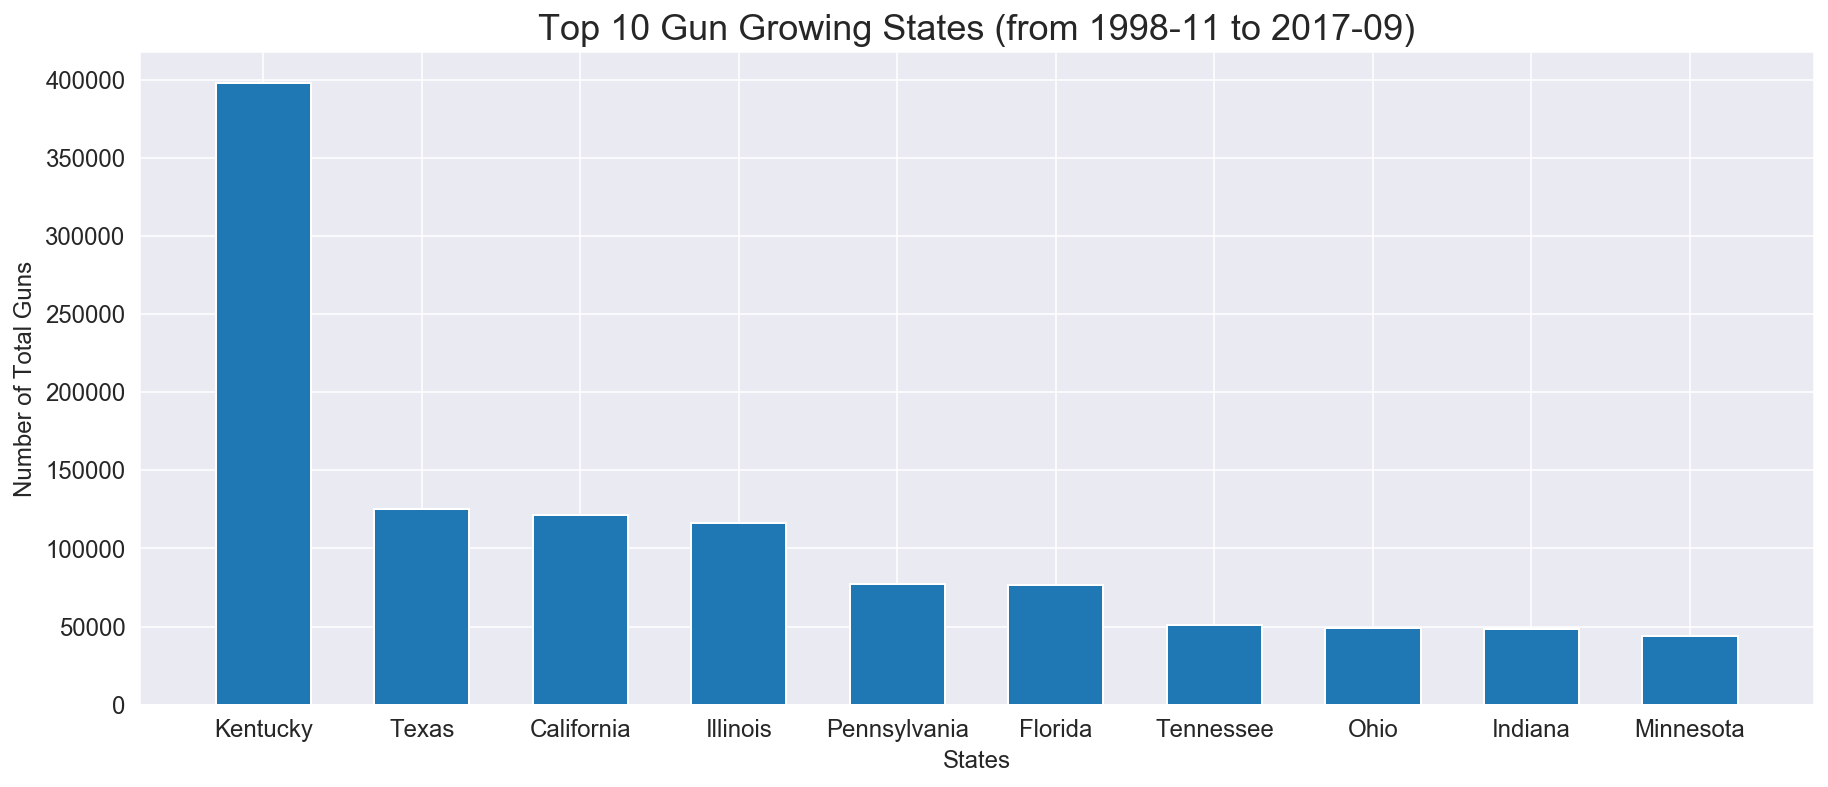

In [1388]:
df_gun_top_growth = gun_grow_tot.sort_values(ascending = False)[:10]

plt.figure(figsize=(15,6))
idx = df_gun_top_growth.index
pos = np.arange(len(idx))

plt.title('Top 10 Gun Growing States (from 1998-11 to 2017-09)', fontsize=18)
plt.xlabel('States', fontsize=12)
plt.xticks(pos, idx)
plt.tick_params(labelsize=12)
plt.ylabel('Number of Total Guns', fontsize=12)

plt.bar(pos, df_gun_top_growth, width=0.6, align='center', label='Total Growth');

> Kentucky has the higest growth by far and almost 3 times more in total number of guns. Following Ketucky are Texas, California, Illinois, and Pennsylvania. 

### Research Question 2: Which state has highest gun per capita in 2016 (latest year of available census data)?  

In [1389]:
#To know gun per capita (GPC) we have to calculate it first
#add a column with the gun per capita(GPC) to the combined_df to make axis be similar and easy to plot

final_df['GPC_2016'] = final_df['totalgun_2016']/final_df['Population estimates base, April 1, 2010,  (V2016)'] 

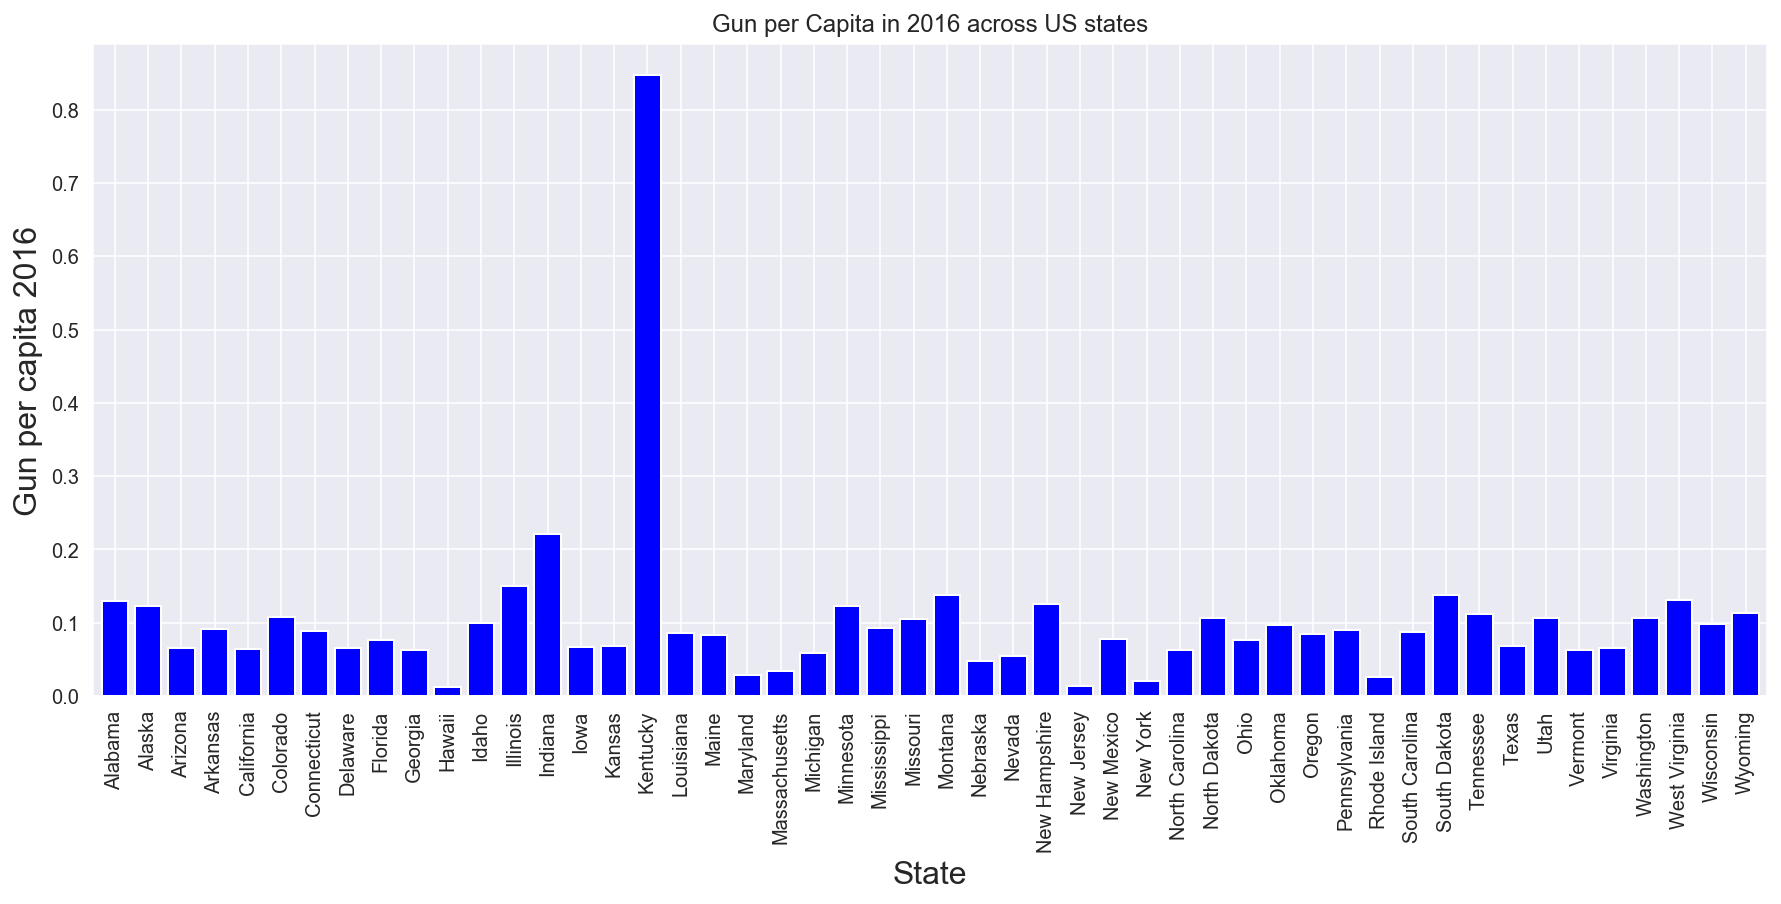

In [1390]:
#here i am plotting the gpc_2016
final_df.plot(x='state', y='GPC_2016',kind='bar',title='Gun per Capita in 2016 across US states',
                 figsize=(15, 6), width=0.8, legend=False,color='blue',alpha=1);
plt.xlabel('State',fontsize=16);
plt.ylabel('Gun per capita 2016',fontsize=16);

 > Kentucky, again, has the highest gun per capita, followed by Indiana and Illinois. 

## Research Question 3: What is the overall trend of gun purchases?

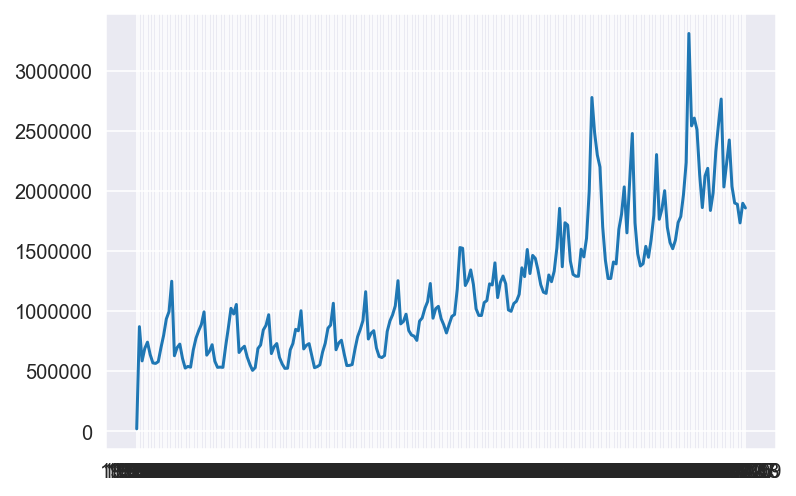

In [1391]:
gun_trend = df1.groupby(['month'])['totals'].sum()

ax = sns.lineplot(data = gun_trend, err_style="bars");

In [1392]:
gun_copy.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


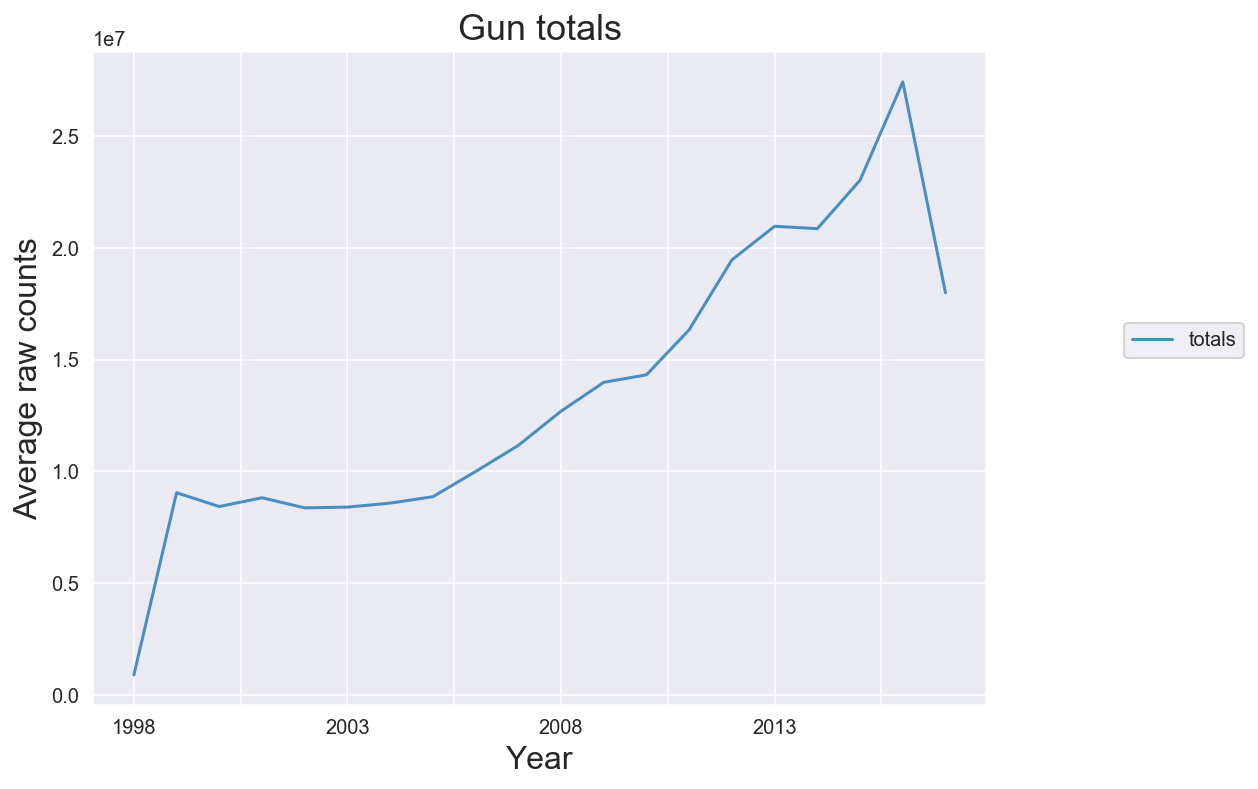

In [1393]:
# here I will group data by year instead of month to smooth out lines 
gun_year.groupby('year')['totals'].sum().plot(kind='line',figsize=(8, 6),alpha=0.8);

plt.ylabel('Average raw counts',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.title('Gun totals',fontsize=18)
plt.legend(bbox_to_anchor=(1.3, 0.6));


#plt.plot("year", "totals", data=gun_year)
#plt.xticks(rotation=90);

#ax = sns.lineplot(x="year", y="totals", data=gun_year)
#fig, ax = plt.subplots(figsize=(4,4))
#sns.lineplot(x="year", y="totals", data = gun_year)
#plt.show()


> The overall trend for purchasing guns every year is increasing and it seems to accelerate over time except for the last 3 years. 

In [1394]:
final_df['GPC_2016'].head()

0    0.129065
1    0.123403
2    0.065122
3    0.091225
4    0.063809
Name: GPC_2016, dtype: float64

## Research quesiton #4: What census data is most associated with high gun per capita?

I will look at relationship between high gun per capita and
- Population per square mile, 2010
- Population growth from 2010 to 2016
- Population pecent under 18, 2016
- White population, 2016
- High school graduate or higher, percent of persons age 25 years+, 2011-2015
- Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
- Median gross rent, 2011-2015
- Median household income (in 2015 dollars), 2011-2015
- Per capita income in past 12 months (in 2015 dollars), 2011-2015
- Persons in poverty, percent

In [1395]:
#Renaming columns to get rid of spaces for easiler access.
column_rename = {
    'Population estimates, July 1, 2016,  (V2016)' : 'population_estimates',
    'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)' : 'population_change',
    'Persons under 5 years, percent, July 1, 2016,  (V2016)' : 'under_5_2016',
    'Persons under 5 years, percent, April 1, 2010' : 'under_5_2010',
    'Persons under 18 years, percent, July 1, 2016,  (V2016)' : 'under_18_2016',
    'Persons under 18 years, percent, April 1, 2010' : 'under_18_2010',
    'Persons 65 years and over, percent,  July 1, 2016,  (V2016)' : 'over_65_2016',
    'Persons 65 years and over, percent, April 1, 2010' : 'over_65_2010',
    'Female persons, percent,  July 1, 2016,  (V2016)' : 'female_2016',
    'Female persons, percent, April 1, 2010' : 'female_2010',
    'White alone, percent, July 1, 2016,  (V2016)' : 'white',
    'Black or African American alone, percent, July 1, 2016,  (V2016)' : 'black',
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)' : 'native_indian',
    'Asian alone, percent, July 1, 2016,  (V2016)' : 'asian',
    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)' : 'pacific_islander',
    'Two or More Races, percent, July 1, 2016,  (V2016)' : 'mixed',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)' : 'hispanic',
    'Veterans, 2011-2015' : 'veterans',
    'Median gross rent, 2011-2015' : 'median_rent',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015' : 'high_school_grad',
    'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015' : 'college_grad',
    'Median household income (in 2015 dollars), 2011-2015' : 'median_household_income',
    'Persons in poverty, percent' : 'poverty',
    'Total employment, 2015' : 'employment',
    'Population per square mile, 2010' : 'population_sq_mile'
}


final_df = final_df.rename(columns = column_rename)
final_df.head()

,state,totalgun_2016,population_estimates,"Population estimates base, April 1, 2010, (V2016)",population_change,"Population, Census, April 1, 2010",under_5_2016,under_5_2010,under_18_2016,under_18_2010,...,Value Flags,-,D,F,FN,0,S,X,Z,GPC_2016
0,Alabama,616947,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129065
1,Alaska,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123403
2,Arizona,416279,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065122
3,Arkansas,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091225
4,California,2377167,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063809


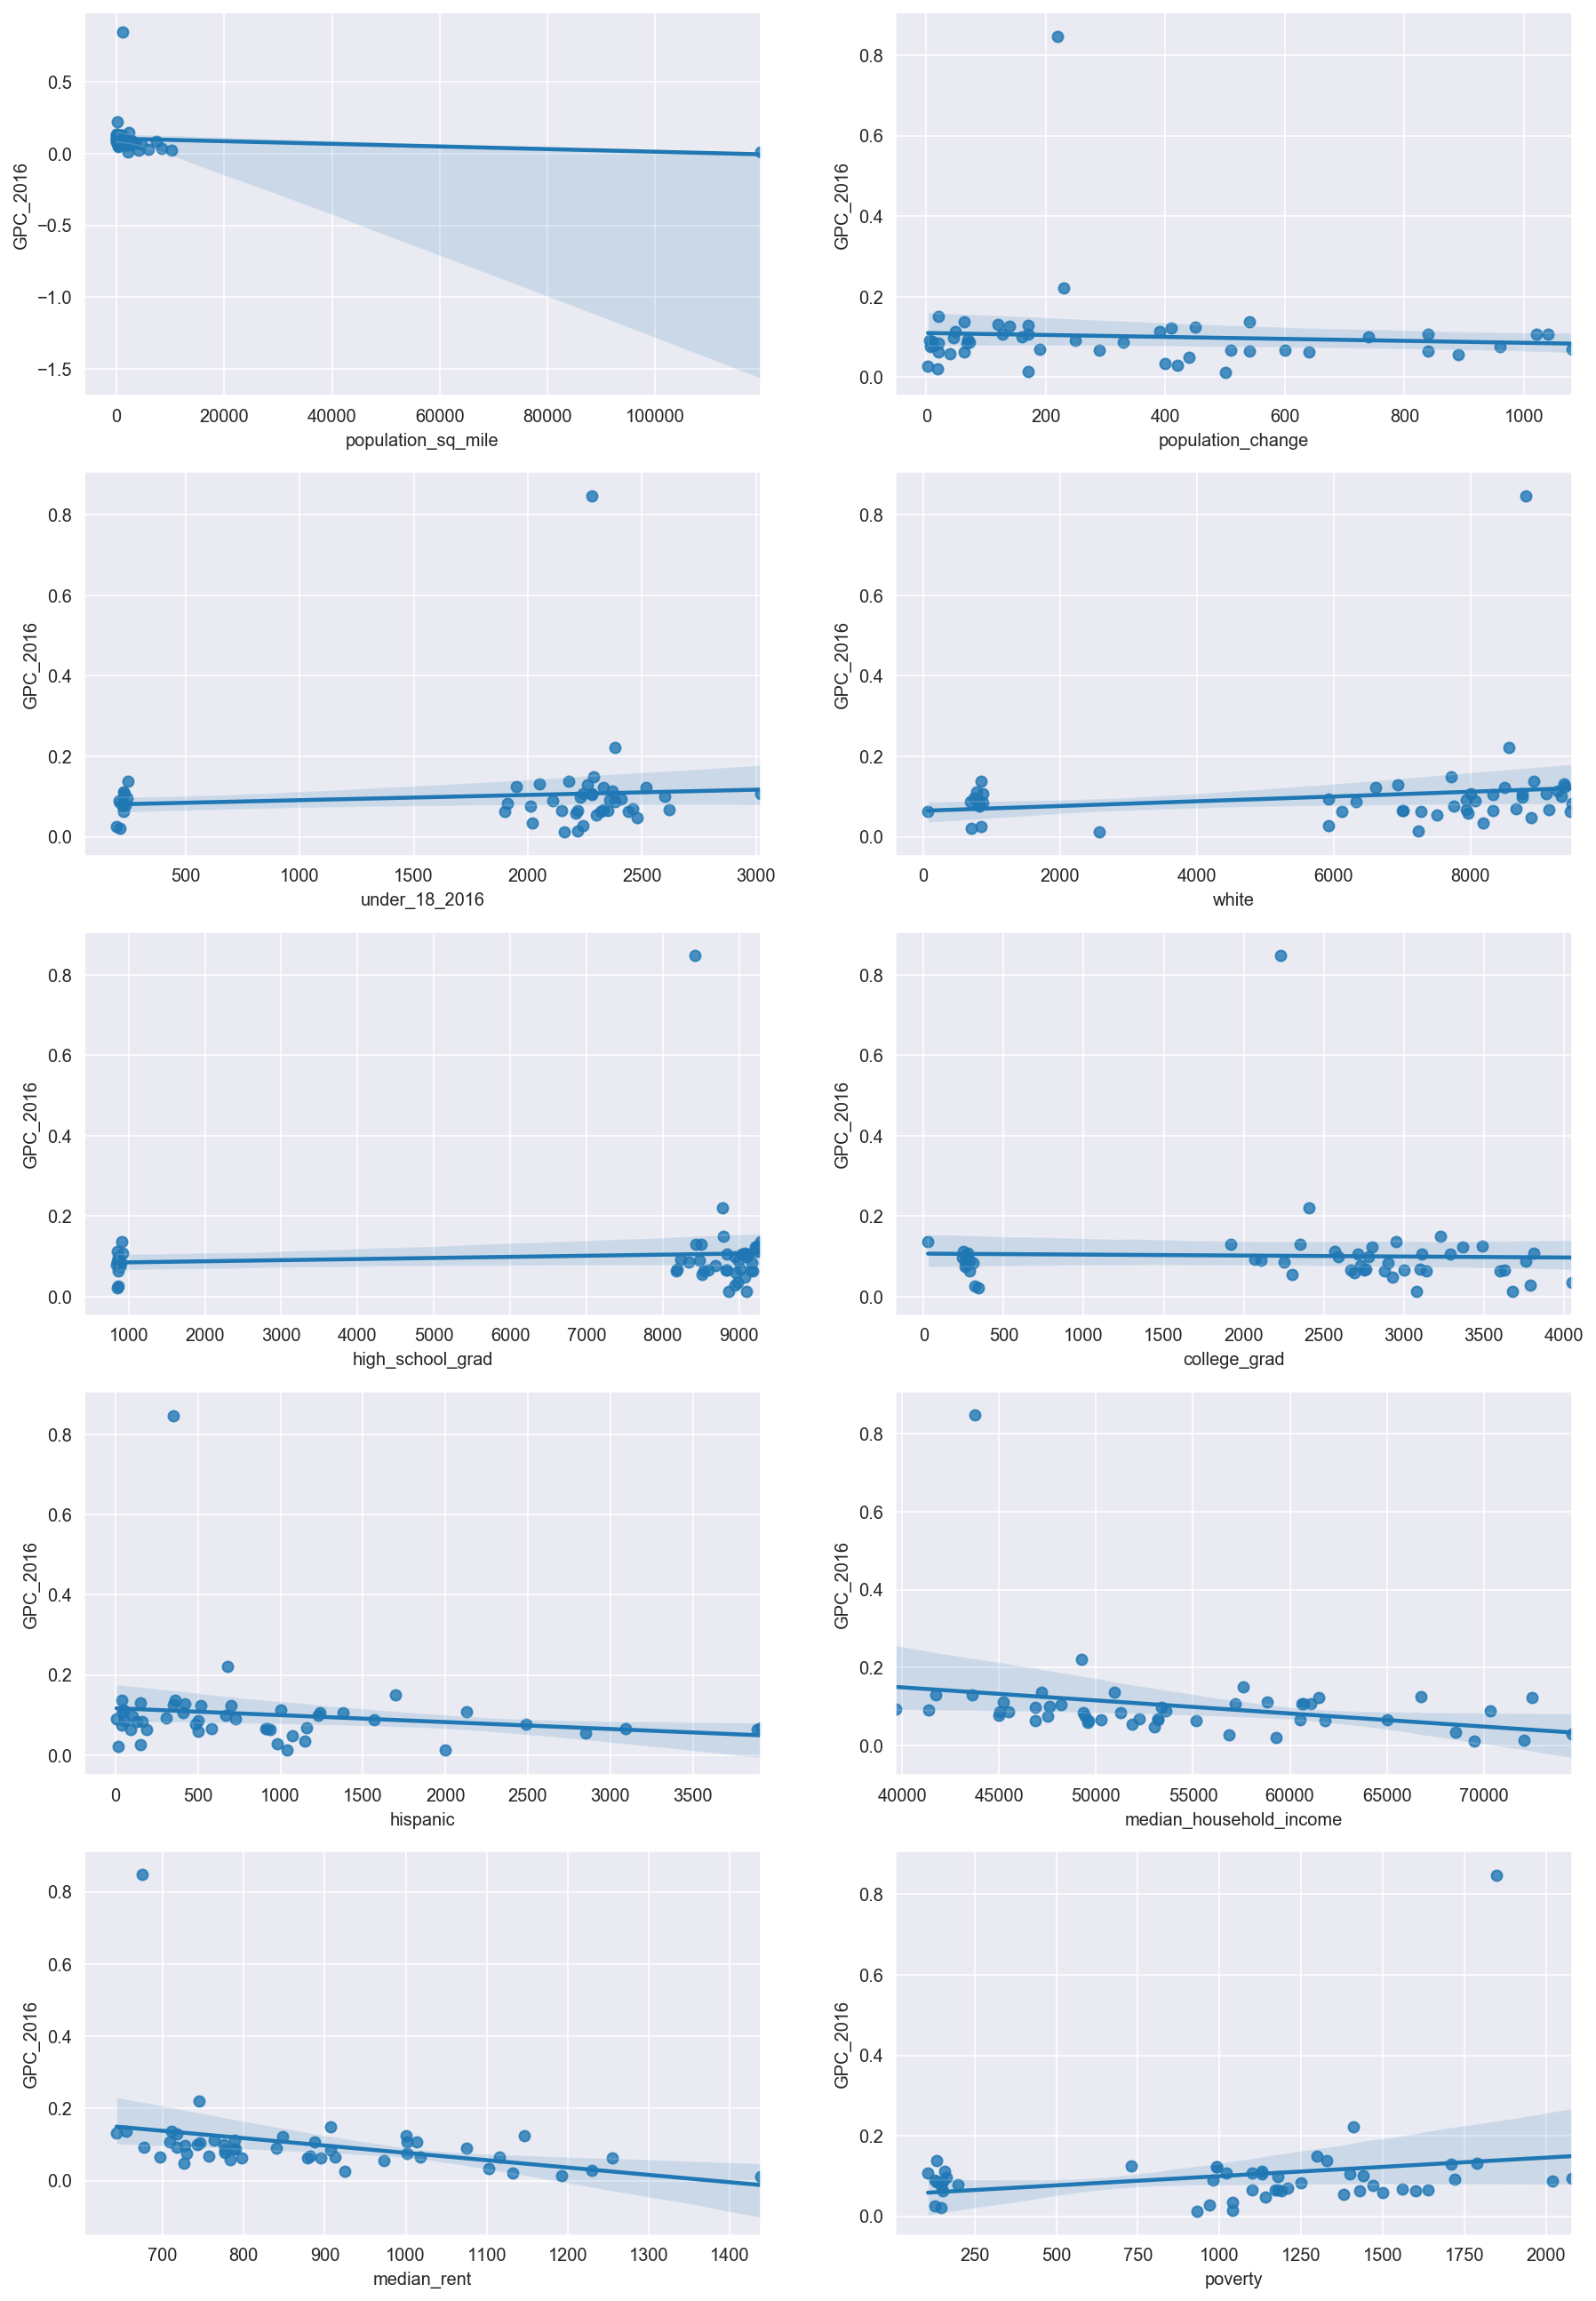

In [1400]:
# Creating 5x2 subplots
fig, ax = plt.subplots(5,2,figsize=(15,23))

# Defining a function to plot scatter plot for gun capita
def plot_gun_capita(x, row, col):
    return sns.regplot(
        x=x,
        y='GPC_2016',
        data=final_df,
        ax=ax[row][col]
    )

plot_gun_capita('population_sq_mile', 0, 0)
plot_gun_capita('population_change', 0, 1)
plot_gun_capita('under_18_2016', 1, 0)
plot_gun_capita('white', 1, 1)
plot_gun_capita('high_school_grad', 2, 0)
plot_gun_capita('college_grad', 2, 1)
plot_gun_capita('hispanic', 3, 0)
plot_gun_capita('median_household_income', 3, 1)
plot_gun_capita('median_rent', 4, 0)
plot_gun_capita('poverty', 4, 1)


> As expected, gun per capita is positively correlated with poverty rate. Gun per capita is negatively correlated with median household income and median rent. Surprisingly, population per square mile and percentage of high school or college graduates do not seem to have much correlation with gun per capita. 

<a id='conclusions'></a>
## Conclusions

> At first, I looked in depth into state level analysis and found out that Kentucky has the higest growth in terms of total numnber of guns from 1998 to 2017. Following Ketucky are Texas, California, Illinois, and Pennsylvania. In terms of gun per capital, Kentucky, again, tops other states, followed by Indiana and Illinois.

> The overall trend for gun purchase is increasing over the years from 1998 to 2017, at accelerating rate, except for the last 3 years. 

> Unfortunately, there weren't very strong variables correlated with gun per capita, but some positive correlation was with poverty rate, and negative correlation was with median household income and median rent. It seems like wealth plays the most important role regarding gun per capita.